## LSTM

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#https://www.youtube.com/watch?v=QIUxPv5PJOY&list=LLB1ma6lM7qAv2t90Or8_H0g&index=7

#https://www.youtube.com/watch?v=h8v9--50mdU&list=LLB1ma6lM7qAv2t90Or8_H0g&index=4

#https://www.youtube.com/watch?v=xaIA83x5Icg&list=LLB1ma6lM7qAv2t90Or8_H0g&index=3
#https://www.youtube.com/watch?v=d_qX2V9iBeQ&list=LLB1ma6lM7qAv2t90Or8_H0g&index=2

In [5]:
a= pd.read_csv("AMZN.csv")
a.head()

,Date,Open,High,Low,Close,Adj Close
0,5/15/97,2.437500,2.500000,1.927083,1.958333,1.958333
1,5/16/97,1.968750,1.979167,1.708333,1.729167,1.729167
2,5/19/97,1.760417,1.770833,1.625000,1.708333,1.708333
3,5/20/97,1.729167,1.750000,1.635417,1.635417,1.635417
4,5/21/97,1.635417,1.645833,1.375000,1.427083,1.427083


In [6]:
a.index

RangeIndex(start=0, stop=5529, step=1)

In [7]:
a['Date'].head()

0    5/15/97
1    5/16/97
2    5/19/97
3    5/20/97
4    5/21/97
Name: Date, dtype: object

In [8]:
#object to covert to datetime obj
a.index=pd.to_datetime(a['Date'])
a.index

DatetimeIndex(['1997-05-15', '1997-05-16', '1997-05-19', '1997-05-20',
               '1997-05-21', '1997-05-22', '1997-05-23', '1997-05-27',
               '1997-05-28', '1997-05-29',
               ...
               '2019-04-23', '2019-04-24', '2019-04-25', '2019-04-26',
               '2019-04-29', '2019-04-30', '2019-05-01', '2019-05-02',
               '2019-05-03', '2019-05-06'],
              dtype='datetime64[ns]', name='Date', length=5529, freq=None)

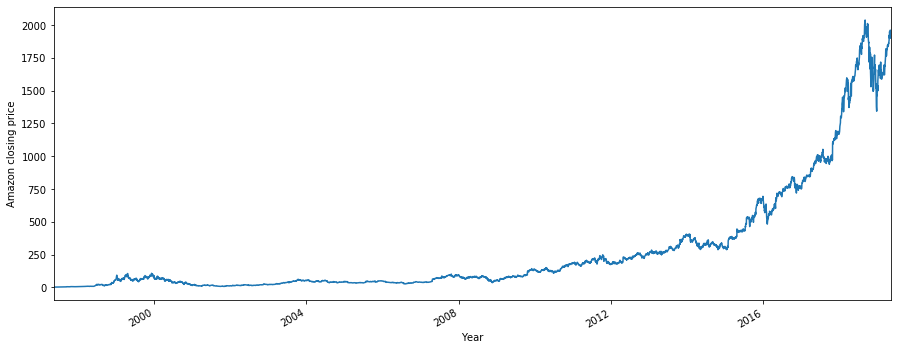

In [9]:
#what you can see== amzn stock price has been slowy rising from befroe 2000 to 2016, from almost $0 to $2000
a['Adj Close'].plot(kind='line',figsize=(15,6))

plt.ylabel('Amazon closing price')
plt.xlabel('Year')

plt.show()

#CLEARLY A TREND , NOT STATIONARY

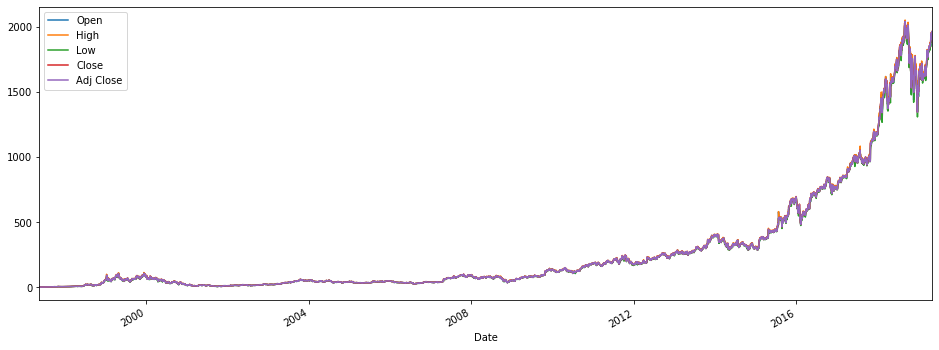

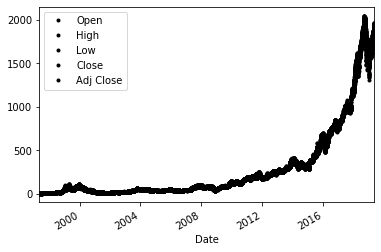

In [31]:
a.plot(figsize=(16,6))
a.plot(style='k.')

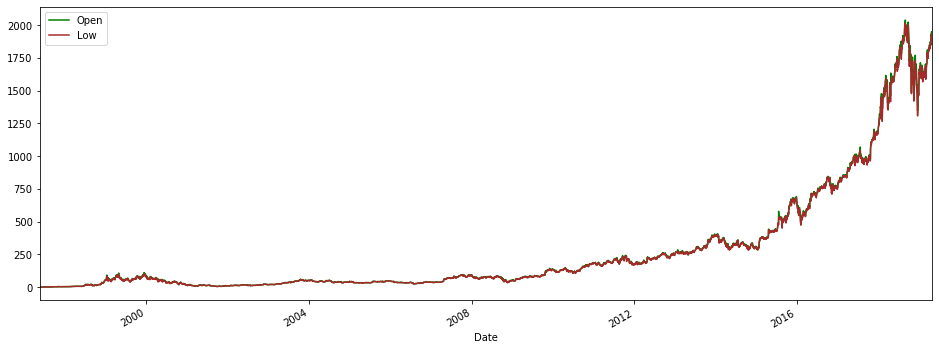

In [32]:
a[['Open', 'Low']].plot(figsize=(16,6), color=['green', 'brown'])

In [33]:
#access specific records, price on given date
a['Adj Close']['5/20/2013']

267.630005

In [34]:
#Time series data assigned at certain point and time, could be second, a day or a minute -Janani Ravi


In [35]:
#Resampling to sample data monthwise to find avg price per month
month_avg=a['Adj Close'].resample('M').mean()
month_avg.head(10)


Date
1997-05-31    1.588542
1997-06-30    1.537699
1997-07-31    2.205493
1997-08-31    2.231399
1997-09-30    3.492560
1997-10-31    4.267437
1997-11-30    4.378564
1997-12-31    4.563210
1998-01-31    4.803906
1998-02-28    5.297423
Freq: M, Name: Adj Close, dtype: float64

In [36]:
month_avg.tail(10)

Date
2018-08-31    1897.851308
2018-09-30    1966.077900
2018-10-31    1782.058265
2018-11-30    1625.483823
2018-12-31    1559.443154
2019-01-31    1640.032389
2019-02-28    1626.937365
2019-03-31    1722.491909
2019-04-30    1866.202375
2019-05-31    1931.337494
Freq: M, Name: Adj Close, dtype: float64

In [37]:
# resampling for median
month_median=a['Adj Close'].resample('M').median()
month_median.head(10)

Date
1997-05-31    1.531250
1997-06-30    1.510417
1997-07-31    2.276042
1997-08-31    2.208333
1997-09-30    3.354167
1997-10-31    4.020833
1997-11-30    4.375000
1997-12-31    4.562500
1998-01-31    4.825521
1998-02-28    5.229167
Freq: M, Name: Adj Close, dtype: float64

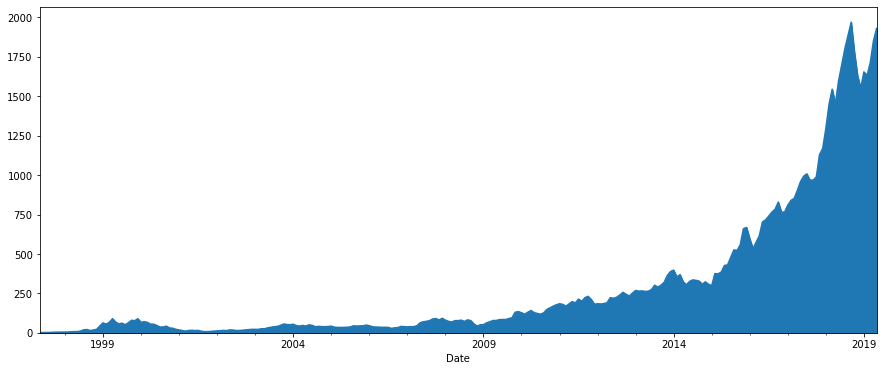

In [38]:
#plotting median
month_median.plot(kind='area',figsize=(15,6))
plt.show()

In [39]:
#Time series data has a natural order, like starting time and ending time
#calculate difference between stock price from one day to another
a_diff= a['Adj Close'].diff()
a_diff.head(10)
#op- first term Nan cause no piror stock

Date
1997-05-15         NaN
1997-05-16   -0.229166
1997-05-19   -0.020834
1997-05-20   -0.072916
1997-05-21   -0.208334
1997-05-22   -0.031250
1997-05-23    0.104167
1997-05-27    0.083333
1997-05-28   -0.052083
1997-05-29   -0.026042
Name: Adj Close, dtype: float64

In [40]:
#perentage change from one day to another aka RETURNS for stocks
a_pct= a['Adj Close'].pct_change()
a_pct.head(10)

Date
1997-05-15         NaN
1997-05-16   -0.117021
1997-05-19   -0.012049
1997-05-20   -0.042683
1997-05-21   -0.127389
1997-05-22   -0.021898
1997-05-23    0.074627
1997-05-27    0.055555
1997-05-28   -0.032895
1997-05-29   -0.017007
Name: Adj Close, dtype: float64

In [66]:
#with time series data we can calculate moving averages
#where we selest a wondow from our time series data and perform an aggregation such as mean
#moving avg of five trading days of stock

moving_avg=a_pct.rolling(window=50).mean()    #used amazon returns by pct.rolling
moving_avg.head(10)

#instead of avg we can also calculate .std(),

#op- first five record nan cause first one nan so the avg is nan of window=5

Date
1997-05-15   NaN
1997-05-16   NaN
1997-05-19   NaN
1997-05-20   NaN
1997-05-21   NaN
1997-05-22   NaN
1997-05-23   NaN
1997-05-27   NaN
1997-05-28   NaN
1997-05-29   NaN
Name: Adj Close, dtype: float64

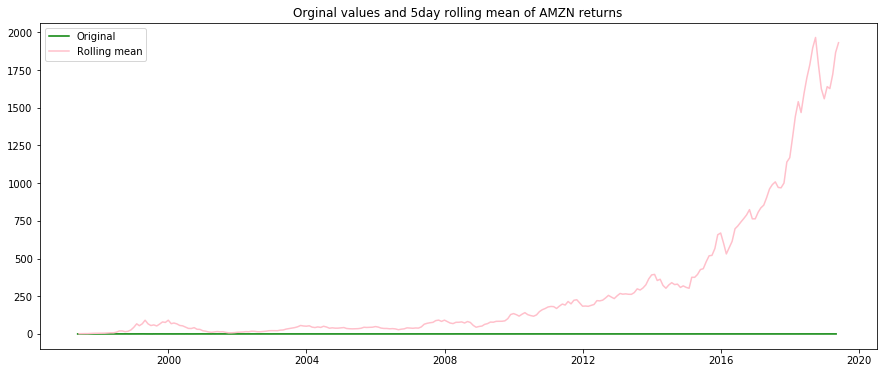

In [67]:
# we will plot amazon returns and window 5 average
fig= plt.figure(figsize=(15,6))

amzn_return= plt.plot(a_pct,color='green',label='Original')
amzn_mean= plt.plot(month_avg,color='pink',label='Rolling mean')

plt.legend(loc='best')  #labels to the lines box
plt.title('Orginal values and 5day rolling mean of AMZN returns')

plt.show()

#rolling mean gives a better idea of how amazon stock prices changed overtime 


### Date time pandas practise

In [43]:

pd.date_range("8:00","15:00", freq="30 min").time

array([datetime.time(8, 0), datetime.time(8, 30), datetime.time(9, 0),
       datetime.time(9, 30), datetime.time(10, 0), datetime.time(10, 30),
       datetime.time(11, 0), datetime.time(11, 30), datetime.time(12, 0),
       datetime.time(12, 30), datetime.time(13, 0), datetime.time(13, 30),
       datetime.time(14, 0), datetime.time(14, 30), datetime.time(15, 0)],
      dtype=object)

In [44]:
#days- included in combining timeseries
days=pd.Series(pd.date_range('2020-1-1',periods=3,freq='D'))  #list three peroids per day
days

0   2020-01-01
1   2020-01-02
2   2020-01-03
dtype: datetime64[ns]

In [45]:
#pandas time delta object is used to represent difference int the time
pd.Timedelta('1day 1hours 1minute 1second')
# adding this to 1st jan 2000, we will get 2nd jan 2000 with 01:01:01 timestamp
pd.Timestamp('01/01/2000') \
                    + pd.Timedelta('1day 1hours 1minute 1second') 

Timestamp('2000-01-02 01:01:01')

In [46]:
pd.Timedelta(days=5,hours=18)

Timedelta('5 days 18:00:00')

In [47]:
#adding two time deltas
pd.Timedelta(days=5,hours=18) \
            + pd.Timedelta(days=1,hours=2)

Timedelta('6 days 20:00:00')

In [48]:
#create time series using timedelta
#create obj of timeseriesdelata as td
#td- included in combining timeseries

td= pd.Series([pd.Timedelta(days=i, hours=9) for i in range(3)])
td


0   0 days 09:00:00
1   1 days 09:00:00
2   2 days 09:00:00
dtype: timedelta64[ns]

In [49]:
#creating time frame combining two series
df =pd.DataFrame(dict(Days= days, Delta=td))
df

,Days,Delta
0,2020-01-01,0 days 09:00:00
1,2020-01-02,1 days 09:00:00
2,2020-01-03,2 days 09:00:00


In [50]:
#indices var assigned to pd.date_range
indices=pd.date_range('01-01-2020',periods=5,freq='30T')
indices

DatetimeIndex(['2020-01-01 00:00:00', '2020-01-01 00:30:00',
               '2020-01-01 01:00:00', '2020-01-01 01:30:00',
               '2020-01-01 02:00:00'],
              dtype='datetime64[ns]', freq='30T')

In [51]:
df=pd.DataFrame({'A':['A','B','C','D','E'],'Value':['50','100','225','345','121']},index=indices)
df

,A,Value
2020-01-01 00:00:00,A,50
2020-01-01 00:30:00,B,100
2020-01-01 01:00:00,C,225
2020-01-01 01:30:00,D,345
2020-01-01 02:00:00,E,121


In [52]:
a.describe()

,Open,High,Low,Close,Adj Close
count,5529.000000,5529.000000,5529.000000,5529.000000,5529.000000
mean,277.799880,280.950590,274.278571,277.765295,277.765295
std,431.384943,435.401154,426.433643,431.130107,431.130107
min,1.406250,1.447917,1.312500,1.395833,1.395833
25%,36.680000,37.349998,36.009998,36.650002,36.650002
50%,77.937500,79.750000,76.290001,78.050003,78.050003
75%,304.000000,306.700012,300.750000,304.130005,304.130005
max,2038.109985,2050.500000,2013.000000,2039.510010,2039.510010


In [53]:
a.size

33174

In [63]:
#smoothing of time series analysis, is calculaated by 10 day moving avg
data_MA= a.rolling(window=20).mean()
data_MA.head(10)

,Open,High,Low,Close,Adj Close
Date,,,,,
1997-05-15,NaN,NaN,NaN,NaN,NaN
1997-05-16,NaN,NaN,NaN,NaN,NaN
1997-05-19,NaN,NaN,NaN,NaN,NaN
1997-05-20,NaN,NaN,NaN,NaN,NaN
1997-05-21,NaN,NaN,NaN,NaN,NaN
1997-05-22,NaN,NaN,NaN,NaN,NaN
1997-05-23,NaN,NaN,NaN,NaN,NaN
1997-05-27,NaN,NaN,NaN,NaN,NaN
1997-05-28,NaN,NaN,NaN,NaN,NaN


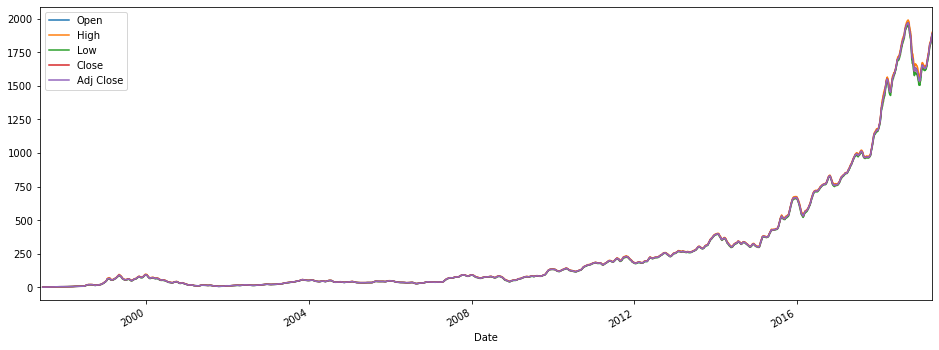

In [64]:
data_MA.plot(figsize=(16,6))

In [68]:
a

,Date,Open,High,Low,Close,Adj Close
Date,,,,,,
1997-05-15,5/15/97,2.437500,2.500000,1.927083,1.958333,1.958333
1997-05-16,5/16/97,1.968750,1.979167,1.708333,1.729167,1.729167
1997-05-19,5/19/97,1.760417,1.770833,1.625000,1.708333,1.708333
1997-05-20,5/20/97,1.729167,1.750000,1.635417,1.635417,1.635417
1997-05-21,5/21/97,1.635417,1.645833,1.375000,1.427083,1.427083
...,...,...,...,...,...,...
2019-04-30,4/30/19,1930.099976,1935.709961,1906.949951,1926.520020,1926.520020
2019-05-01,5/1/19,1933.089966,1943.640015,1910.550049,1911.520020,1911.520020
2019-05-02,5/2/19,1913.329956,1921.550049,1881.869995,1900.819946,1900.819946


In [11]:
#now with this timeseries we will go ahead and create the naive model
#by shifting
a_base=pd.concat([a,a.shift(1)],axis=1)
a_base

,Date,Open,High,Low,Close,Adj Close,Date,Open,High,Low,Close,Adj Close
Date,,,,,,,,,,,,
1997-05-15,5/15/97,2.437500,2.500000,1.927083,1.958333,1.958333,NaN,NaN,NaN,NaN,NaN,NaN
1997-05-16,5/16/97,1.968750,1.979167,1.708333,1.729167,1.729167,5/15/97,2.437500,2.500000,1.927083,1.958333,1.958333
1997-05-19,5/19/97,1.760417,1.770833,1.625000,1.708333,1.708333,5/16/97,1.968750,1.979167,1.708333,1.729167,1.729167
1997-05-20,5/20/97,1.729167,1.750000,1.635417,1.635417,1.635417,5/19/97,1.760417,1.770833,1.625000,1.708333,1.708333
1997-05-21,5/21/97,1.635417,1.645833,1.375000,1.427083,1.427083,5/20/97,1.729167,1.750000,1.635417,1.635417,1.635417
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-04-30,4/30/19,1930.099976,1935.709961,1906.949951,1926.520020,1926.520020,4/29/19,1949.000000,1956.339966,1934.089966,1938.430054,1938.430054
2019-05-01,5/1/19,1933.089966,1943.640015,1910.550049,1911.520020,1911.520020,4/30/19,1930.099976,1935.709961,1906.949951,1926.520020,1926.520020
2019-05-02,5/2/19,1913.329956,1921.550049,1881.869995,1900.819946,1900.819946,5/1/19,1933.089966,1943.640015,1910.550049,1911.520020,1911.520020


In [14]:
a_base.columns=['a_Date', 'a_Open', 'a_High', 'a_Low', 'a_Close', 'a_Adj Close', 's_Date', 's_Open',
       's_High', 's_Low', 's_Close', 's_Adj Close']